In [ ]:
import pandas as pd
df = pd.read_csv('Loan dataset.csv')
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


(981, 13)

In [2]:
df.isnull().sum()


Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

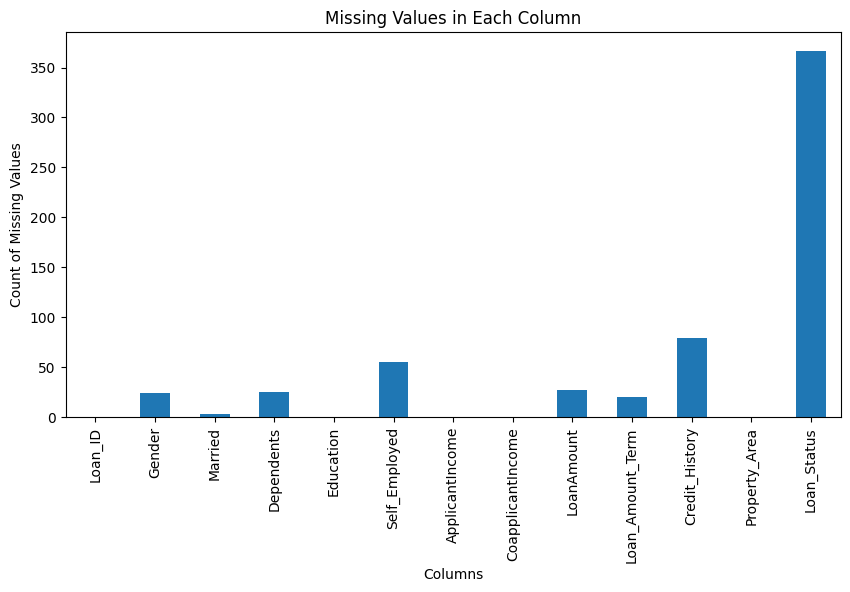

In [3]:
import matplotlib.pyplot as plt

# Count missing values per column
missing = df.isnull().sum()

# Plot bar chart
missing.plot(kind='bar', figsize=(10,5))
plt.title('Missing Values in Each Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.show()


<Axes: >

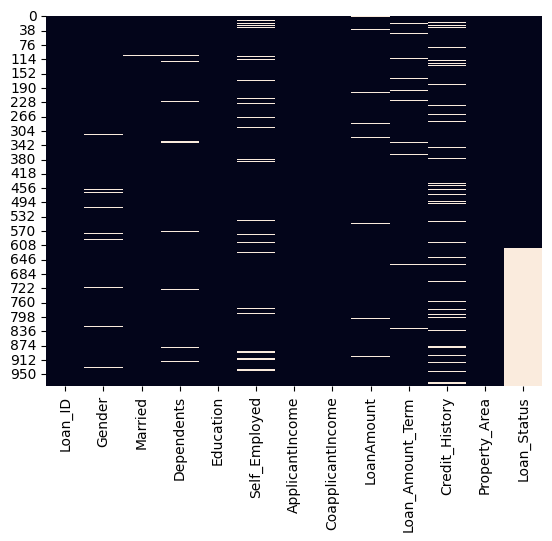

In [6]:
import seaborn as sn
sn.heatmap(df.isnull(), cbar=False)

In [7]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])


In [9]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

<Axes: ylabel='proportion'>

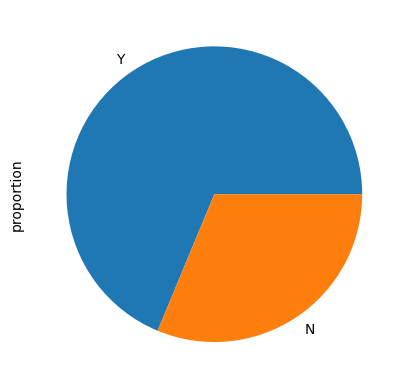

In [12]:
df['Loan_Status'].value_counts()
df['Loan_Status'].value_counts(normalize=True).plot.pie()

<Axes: >

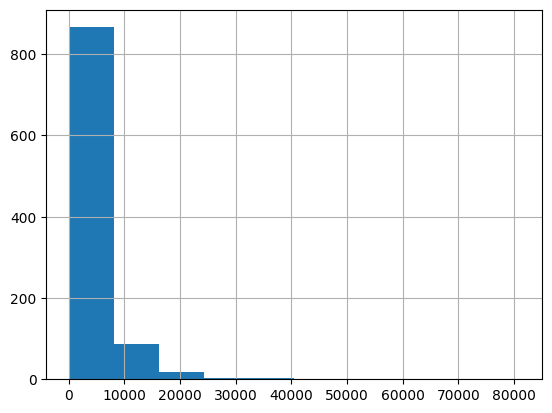

In [13]:
df['ApplicantIncome'].hist()

<Axes: >

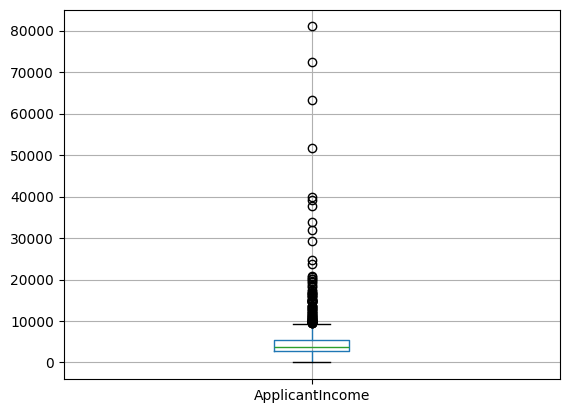

In [14]:
df.boxplot(column='ApplicantIncome' )

<Axes: >

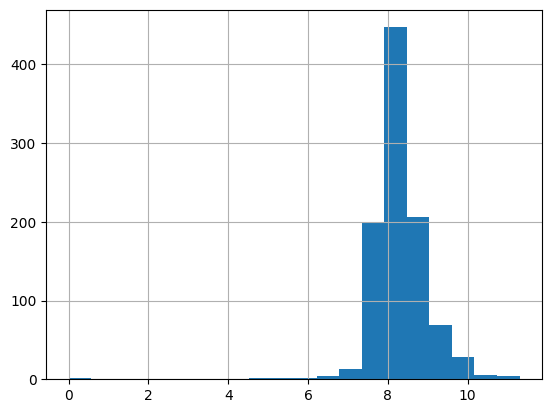

In [17]:
import numpy as np  
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome']+1)
df['ApplicantIncome_log'].hist(bins=20)


<Axes: xlabel='Gender', ylabel='count'>

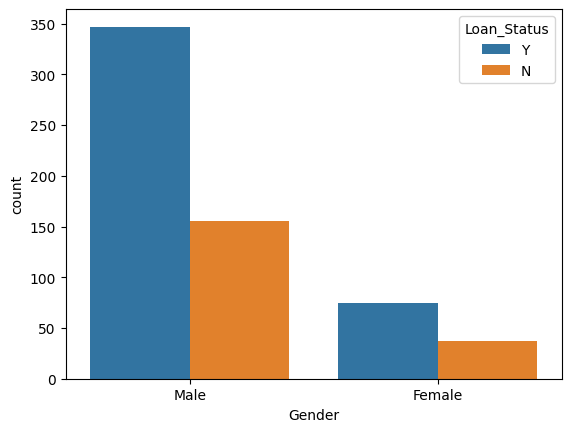

In [20]:
pd.crosstab(df['Gender'],df['Loan_Status'])
sn.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

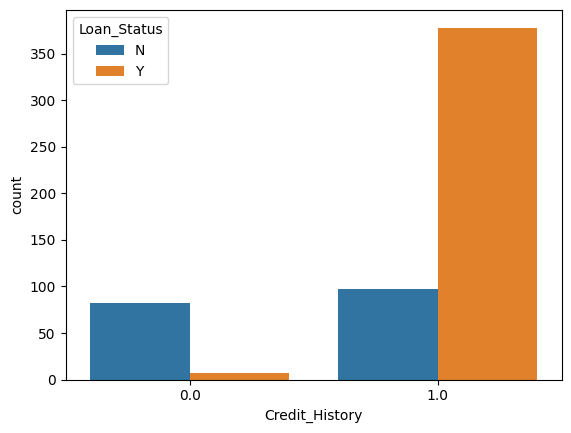

In [24]:
pd.crosstab(df['Credit_History'], df['Loan_Status'])

sn.countplot(x='Credit_History',hue='Loan_Status',data=df)

Percentages:
 Loan_Status         N      Y
Credit_History              
0.0             92.13   7.87
1.0             20.42  79.58


<Axes: xlabel='Credit_History', ylabel='count'>

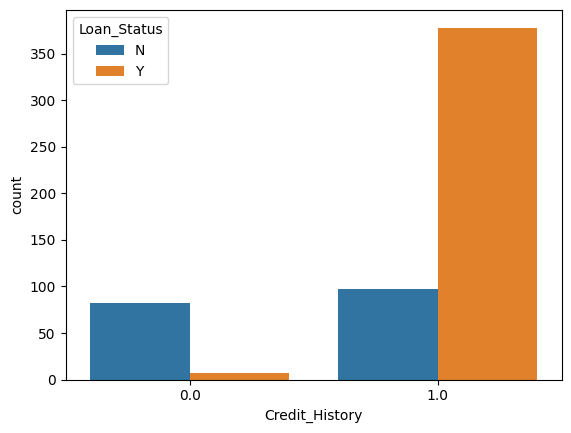

In [33]:
percentages = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100
print("Percentages:\n", percentages.round(2))
sn.countplot(x='Credit_History',hue='Loan_Status',data=df)  


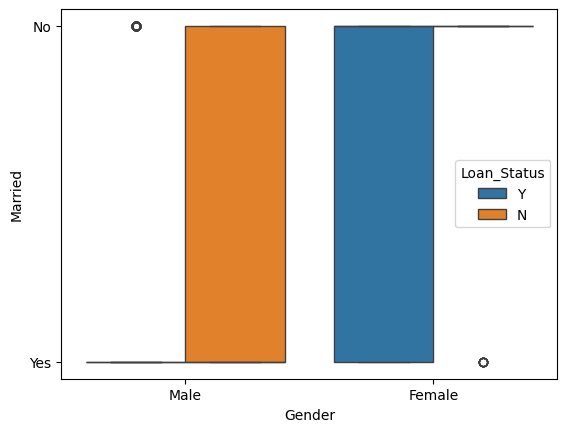

In [41]:
pd.crosstab(df['Gender'], df['Married'], margins=True)
sn.boxplot(x='Gender', y='Married', hue='Loan_Status', data=df)
plt.show()




In [42]:
# Find the mode
mode_edu = df['Education'].mode()[0]

# Fill missing values
df['Education'] = df['Education'].fillna(mode_edu)


In [43]:
df.isnull().sum()


Loan_ID                  0
Gender                   0
Married                  0
Dependents              25
Education                0
Self_Employed           55
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              27
Loan_Amount_Term        20
Credit_History          79
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
dtype: int64

In [44]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [55]:
df['Dependents'] = df['Dependents'].replace('3+', '3')


In [ ]:
df['Dependents'] = df['Dependents'].fillna(0)

In [53]:
df.isnull().sum()


Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed           55
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term        20
Credit_History          79
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
Dependentsr             25
dtype: int64

In [56]:
df.to_csv('cleaned_data.csv', index=False)


In [58]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [60]:
df.isnull().sum()


Loan_ID                  0
Gender                   0
Married                981
Dependents               0
Education                0
Self_Employed           55
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term        20
Credit_History          79
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
Dependentsr             25
dtype: int64

In [65]:

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [66]:
df.isnull().sum()


Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [67]:
print(df["Married"].unique())
df["Married"]=df["Married"].fillna(df["Married"].mode())
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
print(df["Married"].unique())


print(df["Self_Employed"].unique())
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
print(df["Self_Employed"].unique())

print(df["Education"].unique())
df["Education"]=df["Education"].fillna(df["Education"].mode())
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
print(df["Education"].unique())

print(df["Property_Area"].unique())
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode())
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1,"Semiurban":2 })
print(df["Property_Area"].unique())

df.fillna({"ApplicantIncome":np.median(df["ApplicantIncome"])})
df.fillna({"CoapplicantIncome":np.median(df["CoapplicantIncome"])},inplace=True)
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(0)
df["ApplicantIncome_log"]= np.log(df["ApplicantIncome"])
df["CoApplicantIncome_log"]= np.log(df["CoapplicantIncome"])


df.isnull().sum()

['No' 'Yes' nan]
[ 0.  1. nan]
['No' 'Yes' nan]
[0 1]
['Graduate' 'Not Graduate']
[1 0]
['Urban' 'Rural' 'Semiurban']
[0 1 2]


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loan_ID                    0
Gender                    24
Married                    3
Dependents                25
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoApplicantIncome_log      0
dtype: int64

In [68]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [69]:
df['Dependents'] = df['Dependents'].fillna(0)

In [70]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [71]:
df.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status              367
ApplicantIncome_log        0
CoApplicantIncome_log      0
dtype: int64

In [72]:
print(df["Married"].unique())

[0. 1.]


In [73]:
print(df["Education"].unique())

[1 0]


In [74]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoApplicantIncome_log
0,LP001002,Male,0.0,0,1,0,5849,0.0,126.0,360.0,1.0,0,Y,8.674026,-inf
1,LP001003,Male,1.0,1,1,0,4583,1508.0,128.0,360.0,1.0,1,N,8.430109,7.318540
2,LP001005,Male,1.0,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y,8.006368,-inf
3,LP001006,Male,1.0,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y,7.856707,7.765569
4,LP001008,Male,0.0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y,8.699515,-inf


In [83]:
train_df=df[df["Loan_Status"].notna()]
test_df= df[df["Loan_Status"].isna()]
#print(train_df)
#print(test_df)


In [89]:
from sklearn.linear_model import LogisticRegression
X = train_df[[
    'Married',
    'Education',
    'Self_Employed',
    'ApplicantIncome_log',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area'
]]
y=train_df[['Loan_Status']]
model=LogisticRegression()
model.fit(X, y)
p3=[1,1,0,np.log(3200),70,360,1,0]
p1=[0,0,0,np.log(3596),100,240,0,0]

print(model.predict([p3]))

['Y']


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\sit